1. Data preprocessing¶

In [1]:
import os
import pandas as pd
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
# import category_encoders
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import itertools
import random # split datasets

# xgboost
import xgboost as xgb
from xgboost import XGBClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# lightgbm
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from datetime import datetime


import numpy as np 
import pandas as pd 
# Data processing, metrics and modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
# from bayes_opt import BayesianOptimization
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve

from sklearn import metrics
from sklearn import preprocessing
import catboost
from catboost import Pool

# Suppr warning
import warnings
warnings.filterwarnings("ignore")

import itertools
from scipy import interp

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

#Timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('Time taken for Modeling: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

2.Modeling

In [2]:
train_df = pd.read_csv('data/train_after_missing_value_without_dropping_rows.csv')
test_df = pd.read_csv('data/test_after_missing_value_without_dropping_rows.csv')
print(train_df.shape)
print(test_df.shape)

(590540, 289)
(506691, 289)


In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
features = list(train_df)
features.remove('isFraud')
target = 'isFraud'

In [5]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

##### catboost

In [6]:
param_cb = {
        'learning_rate': 0.2,
        'bagging_temperature': 0.1, 
        'l2_leaf_reg': 30,
        'depth': 12, 
        # 'max_leaves': 48,
        'max_bin':255,
        'iterations' : 1000,
        'task_type':'GPU',
        'loss_function' : "Logloss",
        'objective':'CrossEntropy',
        'eval_metric' : "AUC",
        'bootstrap_type' : 'Bayesian',
        'random_seed':1337,
        'early_stopping_rounds' : 100,
        'use_best_model': True 
}

CatBoost GPU modeling...

fold 1


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8218987	best: 0.8218987 (0)	total: 266ms	remaining: 4m 26s
300:	test: 0.9507695	best: 0.9507695 (300)	total: 1m 7s	remaining: 2m 37s
600:	test: 0.9585444	best: 0.9585457 (596)	total: 2m 14s	remaining: 1m 29s
900:	test: 0.9632332	best: 0.9632332 (900)	total: 3m 20s	remaining: 22s
999:	test: 0.9641395	best: 0.9641445 (998)	total: 3m 42s	remaining: 0us
bestTest = 0.9641444683
bestIteration = 998
Shrink model to first 999 iterations.

fold 2


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8229808	best: 0.8229808 (0)	total: 268ms	remaining: 4m 27s
300:	test: 0.9528052	best: 0.9528052 (300)	total: 1m 8s	remaining: 2m 40s
600:	test: 0.9609358	best: 0.9609358 (600)	total: 2m 15s	remaining: 1m 29s
900:	test: 0.9653389	best: 0.9653534 (894)	total: 3m 21s	remaining: 22.2s
999:	test: 0.9663861	best: 0.9664143 (988)	total: 3m 44s	remaining: 0us
bestTest = 0.9664142728
bestIteration = 988
Shrink model to first 989 iterations.

fold 3


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8110447	best: 0.8110447 (0)	total: 255ms	remaining: 4m 14s
300:	test: 0.9474002	best: 0.9474022 (298)	total: 1m 10s	remaining: 2m 44s
600:	test: 0.9573546	best: 0.9573546 (600)	total: 2m 20s	remaining: 1m 33s
900:	test: 0.9610257	best: 0.9610257 (900)	total: 3m 30s	remaining: 23.1s
999:	test: 0.9617145	best: 0.9617145 (999)	total: 3m 53s	remaining: 0us
bestTest = 0.9617145061
bestIteration = 999

fold 4


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8215168	best: 0.8215168 (0)	total: 250ms	remaining: 4m 9s
300:	test: 0.9519674	best: 0.9519674 (300)	total: 1m 13s	remaining: 2m 50s
600:	test: 0.9611944	best: 0.9612141 (598)	total: 2m 27s	remaining: 1m 37s
900:	test: 0.9664164	best: 0.9664164 (900)	total: 3m 39s	remaining: 24.2s
999:	test: 0.9671361	best: 0.9671361 (999)	total: 4m 3s	remaining: 0us
bestTest = 0.967136085
bestIteration = 999

fold 5


Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8073301	best: 0.8073301 (0)	total: 260ms	remaining: 4m 19s
300:	test: 0.9507572	best: 0.9507572 (300)	total: 1m 14s	remaining: 2m 53s
600:	test: 0.9595045	best: 0.9595045 (600)	total: 2m 28s	remaining: 1m 38s
900:	test: 0.9641886	best: 0.9641886 (900)	total: 3m 40s	remaining: 24.3s
999:	test: 0.9649081	best: 0.9649081 (999)	total: 4m 7s	remaining: 0us
bestTest = 0.9649080634
bestIteration = 999

CV roc score        : 0.9649, std: 0.0019. 
CV accuracy score   : 0.9860, std: 0.0002. 
CV recall score     : 0.6300, std: 0.0061. 
CV precision score  : 0.9529, std: 0.0020. 
CV f1 score         : 0.7585, std: 0.0044.
Time taken for Modeling: 0 hours 20 minutes and 42.71 seconds.


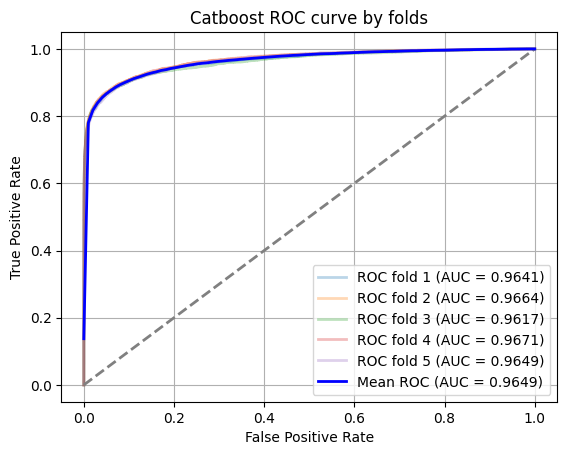

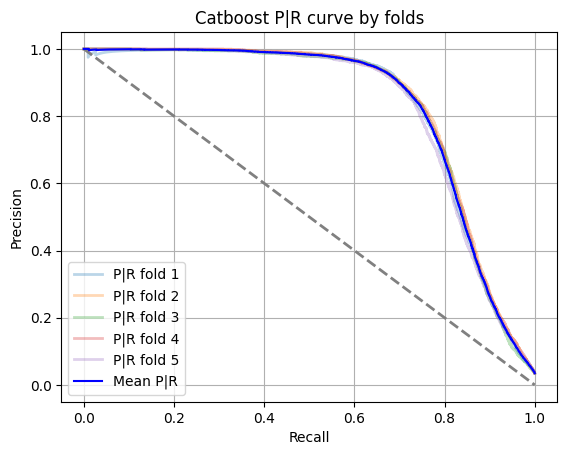

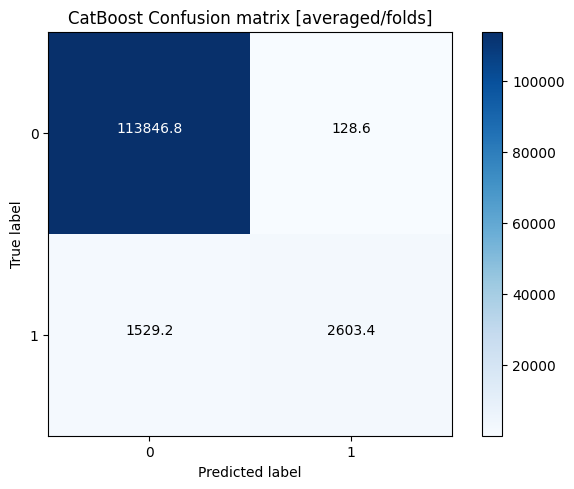

In [8]:
print('CatBoost GPU modeling...')
start_time = timer(None)
plt.rcParams["axes.grid"] = True

nfold = 5
skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=42)

oof = np.zeros(len(train_df))
mean_fpr = np.linspace(0,1,100)
cms= []
tprs = []
aucs = []
y_real = []
y_proba = []
recalls = []
roc_aucs = []
f1_scores = []
accuracies = []
precisions = []
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

i = 1
for train_idx, valid_idx in skf.split(train_df, train_df.isFraud.values):
    print("\nfold {}".format(i))
    trn_data = Pool(train_df.iloc[train_idx][features].values,
                   label=train_df.iloc[train_idx][target].values
                   )
    val_data = Pool(train_df.iloc[valid_idx][features].values,
                   label=train_df.iloc[valid_idx][target].values
                   )   

    clf = catboost.train(trn_data, param_cb, eval_set= val_data, verbose = 300)

    oof[valid_idx]  = clf.predict(train_df.iloc[valid_idx][features].values)   
    oof[valid_idx]  = np.exp(oof[valid_idx]) / (1 + np.exp(oof[valid_idx]))
    
    predictions += clf.predict(test_df[features]) / nfold
    predictions = np.exp(predictions)/(1 + np.exp(predictions))
    
    # Scores 
    roc_aucs.append(roc_auc_score(train_df.iloc[valid_idx][target].values, oof[valid_idx]))
    accuracies.append(accuracy_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
    recalls.append(recall_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
    precisions.append(precision_score(train_df.iloc[valid_idx][target].values ,oof[valid_idx].round()))
    f1_scores.append(f1_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
    
    # Roc curve by fold
    f = plt.figure(1)
    fpr, tpr, t = roc_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i,roc_auc))

    # Precion recall by folds
    g = plt.figure(2)
    precision, recall, _ = precision_recall_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
    y_real.append(train_df.iloc[valid_idx][target].values)
    y_proba.append(oof[valid_idx])
    plt.plot(recall, precision, lw=2, alpha=0.3, label='P|R fold %d' % (i))  
    
    i= i+1
    
    # Confusion matrix by folds
    cms.append(confusion_matrix(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
    
    # Features imp
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.get_feature_importance()
    fold_importance_df["fold"] = nfold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

# Metrics
print(
        '\nCV roc score        : {0:.4f}, std: {1:.4f}.'.format(np.mean(roc_aucs), np.std(roc_aucs)),
        '\nCV accuracy score   : {0:.4f}, std: {1:.4f}.'.format(np.mean(accuracies), np.std(accuracies)),
        '\nCV recall score     : {0:.4f}, std: {1:.4f}.'.format(np.mean(recalls), np.std(recalls)),
        '\nCV precision score  : {0:.4f}, std: {1:.4f}.'.format(np.mean(precisions), np.std(precisions)),
        '\nCV f1 score         : {0:.4f}, std: {1:.4f}.'.format(np.mean(f1_scores), np.std(f1_scores))
)

#ROC
f = plt.figure(1)
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'grey')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.4f)' % (np.mean(roc_aucs)),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Catboost ROC curve by folds')
plt.legend(loc="lower right")

# PR plt
g = plt.figure(2)
plt.plot([0,1],[1,0],linestyle = '--',lw = 2,color = 'grey')
y_real = np.concatenate(y_real)
y_proba = np.concatenate(y_proba)
precision, recall, _ = precision_recall_curve(y_real, y_proba)
plt.plot(recall, precision, color='blue',
         label=r'Mean P|R')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Catboost P|R curve by folds')
plt.legend(loc="lower left")

# Confusion maxtrix & metrics
plt.rcParams["axes.grid"] = False
cm = np.average(cms, axis=0)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title= 'CatBoost Confusion matrix [averaged/folds]')
# Timer end    
timer(start_time)

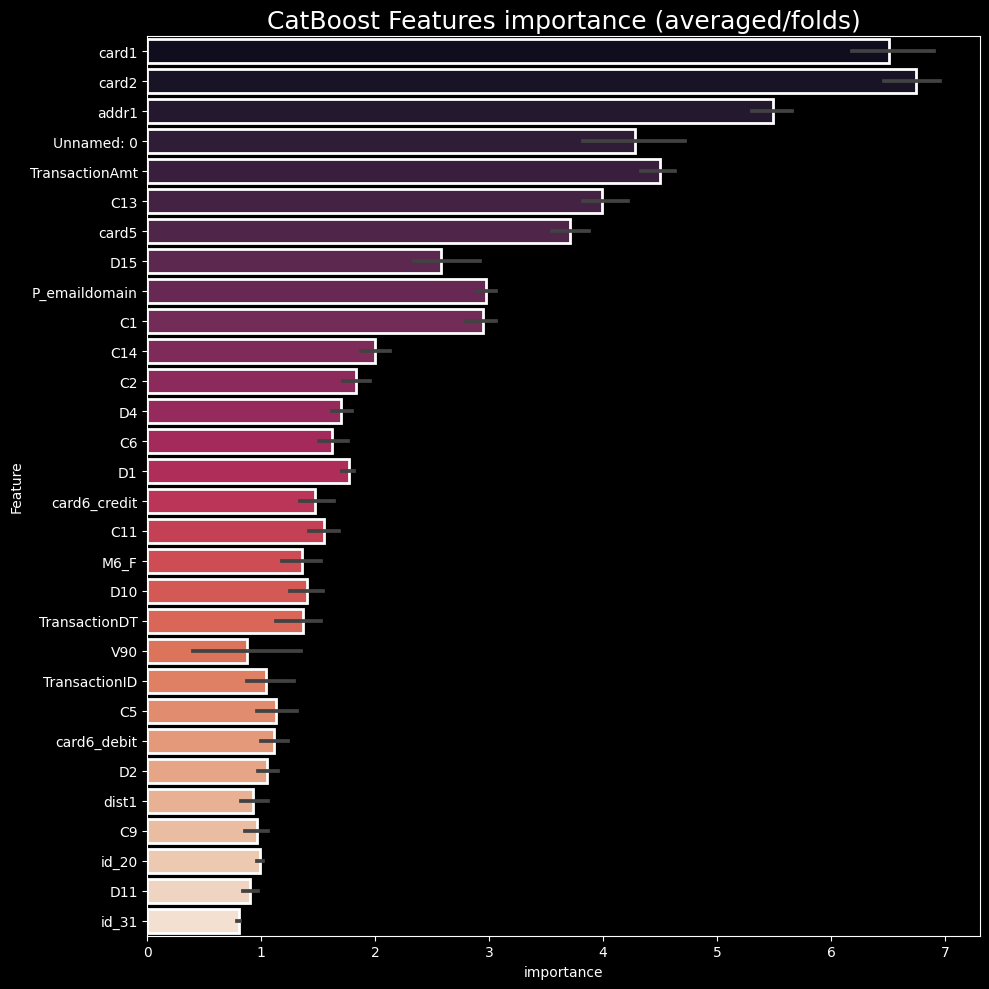

In [9]:
plt.style.use('dark_background')
cols = (feature_importance_df[["Feature", "importance"]]
    .groupby("Feature")
    .mean()
    .sort_values(by="importance", ascending=False)[:30].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(10,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False),
        edgecolor=('white'), linewidth=2, palette="rocket")
plt.title('CatBoost Features importance (averaged/folds)', fontsize=18)
plt.tight_layout()